<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Práctica 3. Graficación en Python </h2> 

---
### Alumno: Pérez Trejo Brandon Eliud
---

### **EJERCICIOS**:

$\;$

#### **1. Gráfica de datos experimentales:** El archivo _manchasolares.txt_ (adjunto), contiene el número observado de manchas solares en el Sol en cada mes desde enero de 1749. El archivo contiene dos columnas de números, la primera es el mes y la segunda el número de manchas solares.


#### **(a)** Escribe un programa que lea los datos y haga una gráfica de las manchas solares en función del tiempo

Text(0, 0.5, 'Numero de manchas solares')

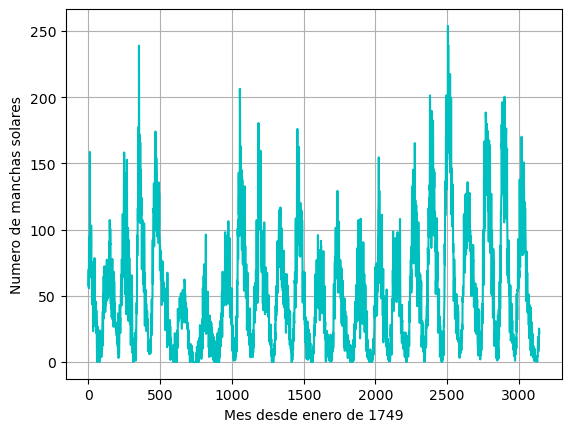

In [1]:
# Importo las librerías que voy a utilizar para procesar los datos y graficar.
import numpy as np
import matplotlib.pyplot as pl

entrada = open("manchasolares.txt", "r") # Hago un buffer del archivo txt

solar = []
for i in entrada:
    solar.append(i) # Guardo cada línea del archivo en una lista vacía

# Para separar los datos en 2 columnas, defino dos listas vacías que serán dominio y codominio de graficación
dom = []
cod = []
for s in solar:
    linea = s.split('\t') # Quito los espacios indicados por \t de cada línea
    dom.append(float(linea[0].strip())) # Agrego el elemento cero de cada línea a una lista como flotante
    cod.append(float(linea[1].strip()))

# Convierto las listas en tuplas de numpy
dom = np.array(dom) 
cod = np.array(cod)

# Grafico los datos y agrego nombres a los ejes cartesianos
pl.plot(dom,cod,'c')
pl.grid()
pl.xlabel('Mes desde enero de 1749')
pl.ylabel('Numero de manchas solares')

#### **(b)** Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

Text(0, 0.5, 'Numero de manchas solares')

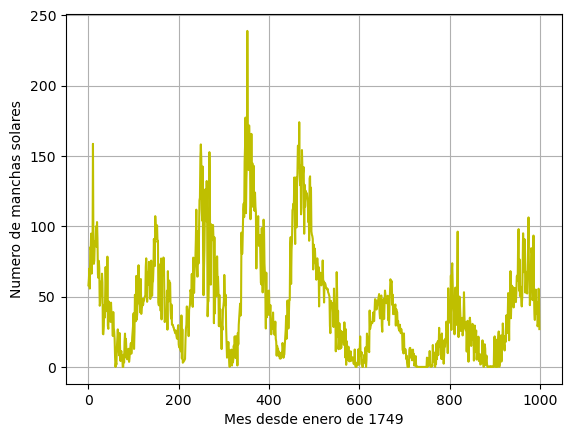

In [2]:
# Para este caso solo vuelvo a definir los las listas incluyendo solo los valores del 0 al 100 en ellas

dom2 = dom[:1000]
cod2 = cod[:1000]

# Grafico estas dos listas exactamente igual que antes
pl.plot(dom2,cod2,'y')
pl.grid()
pl.xlabel('Mes desde enero de 1749')
pl.ylabel('Numero de manchas solares')

#### **(c)** Modifica nuevamente tu programa para calcular y graficar la _media (promedio) móvil_ de los datos, definida por:

$$
    Y_k = \frac{1}{2r+1}\sum _{m=-r}^r y_{k+m}
$$

#### donde $r=5$ (en este caso) y $y_k$ son los números de manchas solares. El programa debe graficar tanto los datos originales como la _media móvil_ en el mismo gráfico, sólo sobre los primeros 1000 datos.

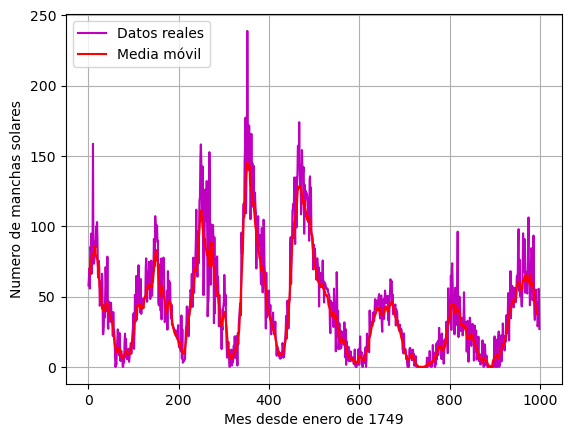

In [3]:
# Creo por tercera vez otro arreglo que consta de la media promedio para un r dado


cod3 = []
r = 5

for k in range(r,1000-r): # Solo considero a los elementos "y" en cod2 que foman una vecindad completa (y-r,y+r)
    rebanada = cod2[k-r:k+r] # Hago rebanadas de cod2 que corresponden a dichas vecindades y les aplico la fórmula del promedio
    yk = (1/(2*r+1))*sum(rebanada)
    cod3.append(yk) # Agrego el resultado a la lista inicialmente definida

# Para poder graficar, los arrelos de dominio y codominio deben tener la misma cantidad de elementos
dom3 = dom2[r:len(dom2)-r]

# Grafico igual que antes, pero incluyo en segundo lugar la gráfica del promedio móvil. Además, añado una etiqueta para distinguirlos
pl.plot(dom2,cod2,'m', label='Datos reales')
pl.plot(dom3,cod3,'r',label='Media móvil')
pl.grid()
pl.xlabel('Mes desde enero de 1749')
pl.ylabel('Numero de manchas solares')
pl.legend(loc=2)

Como nota extra, para valores más grandes de rla curva en rojo (rosa) se va suavizando

#### **2. Gráfica de curvas** Aunque la función plot está diseñada principalmente para hacer gráficos xy estándar, se puede adaptar para otros tipos de gráfica también.

#### **(a)** Grafica la urva llamada _deltoide_, definida paramétricamente por las ecuaciones

$$
    x = 2\cos{(\theta)} + \cos{(2\theta)} \hspace{2cm} y = 2\sin{(\theta)}-\sin{(2\theta)}
$$

#### donde $0\leq \theta < 2\pi$. Toma un conjunto de valores para $\theta$ entre $0$ y $2 \pi$ y calcula $x(\theta)$ e $y(\theta)$ usando las ecuaciones anteriores, para posteriormente graficar $y$ como función de $x$.

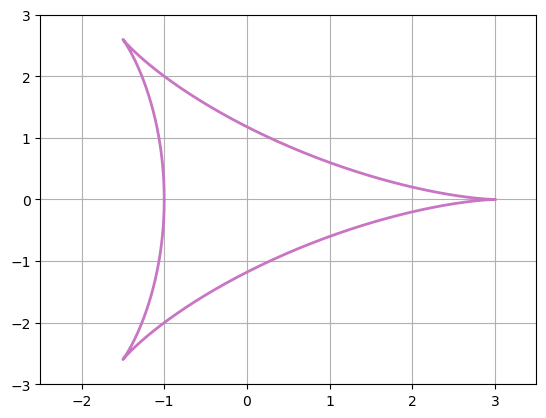

In [34]:
# Ya importé las bibliotecas matplotlib y numpy

# Defino una lista con los valores que puede tomar theta
th = np.linspace(0,2*(np.pi),1000)

# Defino ahora dos funciones que corresponden a los valores x(theta) y y(theta)

def x(t):
    return (2*np.cos(t)+np.cos(2*t))

def y(t):
    return (2*np.sin(t)-np.sin(2*t))

# Grafico la función (x(theta),y(theta)) y ajusto el rango de los ejes 
pl.plot(x(th),y(th),color = '#C875C4',lw = '2') # Aquí puse un color "orquídea" e hice la línea más gruesa para que se notara mejor
pl.xlim(-2.5,3.5)
pl.ylim(-3,3)
pl.grid()


#### **(b)** Usando este mismo enfoque, se puede hacer una gráfica polar $r=f(\theta)$ para alguna función $f$ calculando $r$ para un rango de valores de $\theta$ y luego convirtiendo $r$ y $\theta$ a coordenadas cartesianas usando las ecuaciones estándar:

$$
    x=r\cos{(\theta)} \hspace{2cm} y=r\sin{(\theta)}
$$

#### Utiliza este método para trazar la _espiral Galileana_ $r=\theta ^2$ para $0\leq \theta \leq 10\pi$.

In [48]:
# Defino una lista con los valores que puede tomar theta
th = np.linspace(0,2*(np.pi),100)

# Defino la función f(z)=z^2
def f(z):
    return z**2

# Con la función map puedo crear un arreglo r
r = np.array(list(map(f,th)))



array([0.00000000e+00, 4.02799894e-03, 1.61119958e-02, 3.62519905e-02,
       6.44479830e-02, 1.00699973e-01, 1.45007962e-01, 1.97371948e-01,
       2.57791932e-01, 3.26267914e-01, 4.02799894e-01, 4.87387872e-01,
       5.80031847e-01, 6.80731821e-01, 7.89487792e-01, 9.06299761e-01,
       1.03116773e+00, 1.16409169e+00, 1.30507166e+00, 1.45410762e+00,
       1.61119958e+00, 1.77634753e+00, 1.94955149e+00, 2.13081144e+00,
       2.32012739e+00, 2.51749934e+00, 2.72292728e+00, 2.93641123e+00,
       3.15795117e+00, 3.38754711e+00, 3.62519905e+00, 3.87090698e+00,
       4.12467091e+00, 4.38649084e+00, 4.65636677e+00, 4.93429870e+00,
       5.22028663e+00, 5.51433055e+00, 5.81643047e+00, 6.12658639e+00,
       6.44479830e+00, 6.77106622e+00, 7.10539013e+00, 7.44777004e+00,
       7.79820595e+00, 8.15669785e+00, 8.52324576e+00, 8.89784966e+00,
       9.28050956e+00, 9.67122545e+00, 1.00699973e+01, 1.04768252e+01,
       1.08917091e+01, 1.13146490e+01, 1.17456449e+01, 1.21846968e+01,
      

#### **(c)** Con el mismo método. haz una gráfica polar de la "función de Fey"

$$
    r=e^{\cos\theta}-2\cos{4\theta}+\sin^5\frac{\theta}{12}
$$

#### en el rango $0\leq\theta\leq24\pi$

#### **La gráfica de Feigenbaum (caos determinista)**